<a href="https://colab.research.google.com/github/Alisiyyal/Portfolio-/blob/main/REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# simple_linear_regression_with_pro_tips.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [94]:
# 1. Understanding the Dataset
df = pd.read_csv("DATA.CSV")

In [95]:
# Check for missing values and outliers
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [96]:
df_small = df.sample(50, random_state=1)


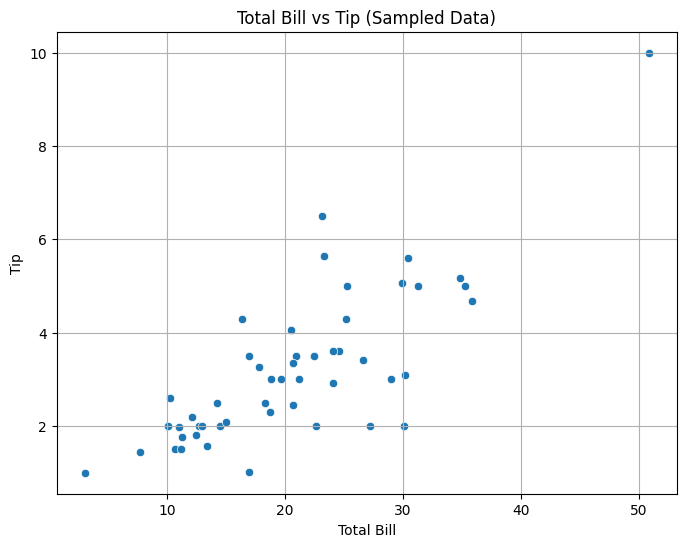

In [97]:
# 2. Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df_small)
plt.title('Total Bill vs Tip (Sampled Data)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

In [98]:
# 3. Model Building (Simple Linear Regression)
X = df_small[['total_bill']]  # Feature: Total Bill
y = df_small['tip']  # Target: Tip

In [99]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [101]:
# 4. Model Evaluation (Simple Linear Regression)
print("== Simple Linear Regression ==")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

== Simple Linear Regression ==
MSE: 0.93
R² Score: -0.06


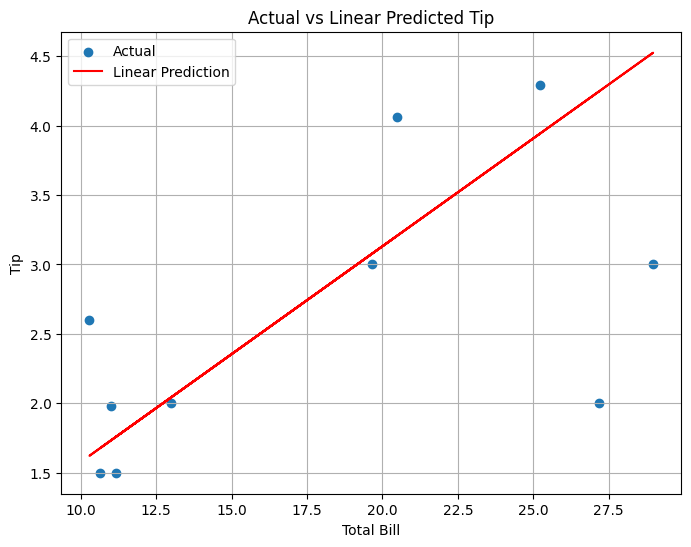

In [102]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Prediction')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Actual vs Linear Predicted Tip')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
#  Experiment with another feature
print("== Linear Regression with 'size' feature ==")
X_multi = df_small[['total_bill', 'size']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train2, y_train2)
y_pred_multi = model_multi.predict(X_test2)
print(f"MSE: {mean_squared_error(y_test2, y_pred_multi):.2f}")
print(f"R2 Score: {r2_score(y_test2, y_pred_multi):.2f}")


== Linear Regression with 'size' feature ==
MSE: 1.06
R2 Score: -0.21


In [104]:
# Polynomial regression
print("== Polynomial Regression (degree 2) ==")
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_small[['total_bill']])
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_p = model_poly.predict(X_test_p)
print(f"MSE: {mean_squared_error(y_test_p, y_pred_p):.2f}")
print(f"R2 Score: {r2_score(y_test_p, y_pred_p):.2f}")

== Polynomial Regression (degree 2) ==
MSE: 0.84
R2 Score: 0.05


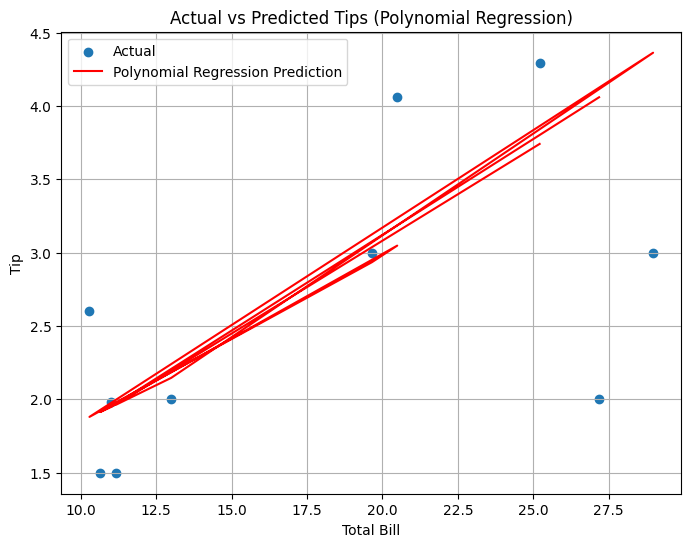

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_p[:, 1], y_test_p, label='Actual')  # Only plot the feature (total_bill) in X_test_p
plt.plot(X_test_p[:, 1], y_pred_p, color='red', label='Polynomial Regression Prediction')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Actual vs Predicted Tips (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

                  Model       MSE  R2 Score
0         Simple Linear  0.934377 -0.057992
1  Multi-Feature Linear  1.064555 -0.205392
2    Polynomial (deg 2)  0.835380  0.054102


<ipython-input-106-7f6bcfbf3efd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results, palette='Set2')
<ipython-input-106-7f6bcfbf3efd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results, palette='Set1')


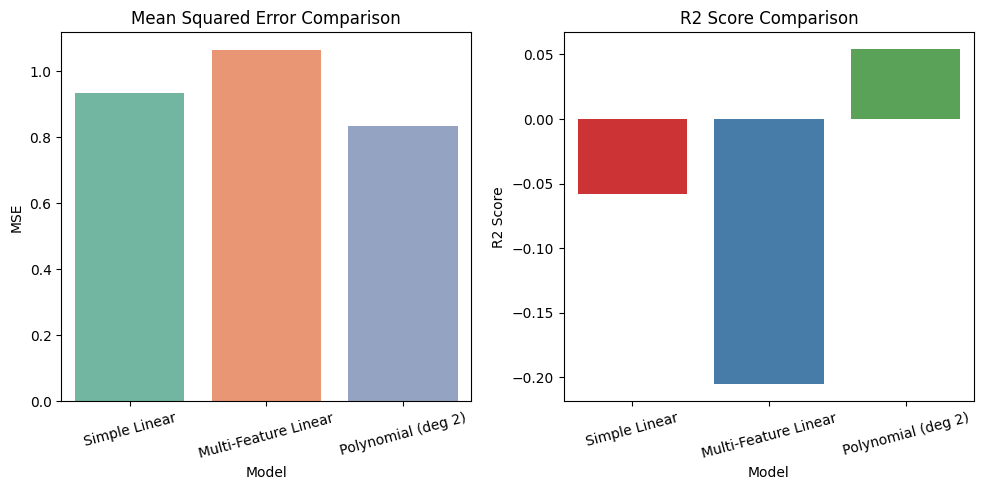

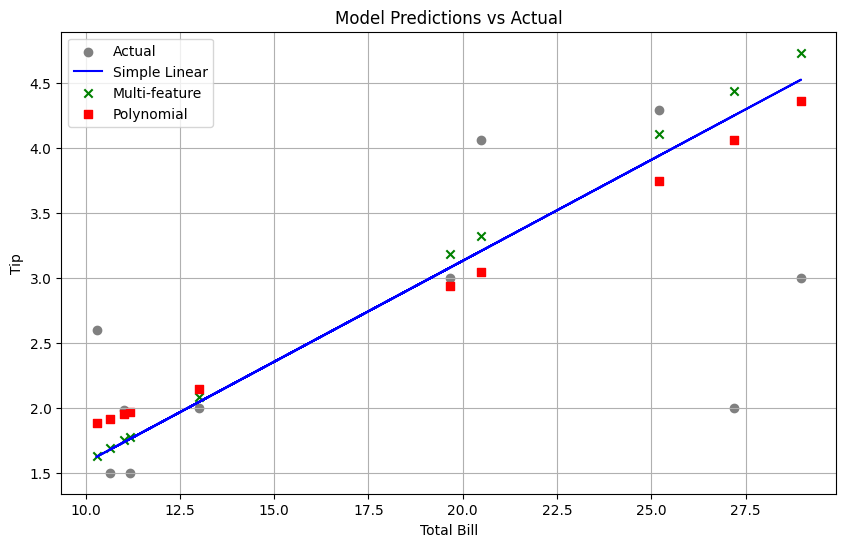

In [106]:

# ===== Results Summary =====
results = pd.DataFrame({
    'Model': ['Simple Linear', 'Multi-Feature Linear', 'Polynomial (deg 2)'],
    'MSE': [mse_s, mse_m, mse_p],
    'R2 Score': [r2_s, r2_m, r2_p]
})
print(results)

# ===== Visualization =====
plt.figure(figsize=(10, 5))

# Bar chart for MSE and R2
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results, palette='Set2')
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=results, palette='Set1')
plt.title('R2 Score Comparison')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# ===== Plotting Predictions =====
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, label='Actual', color='gray')
plt.plot(X_test_s, y_pred_s, label='Simple Linear', color='blue')
plt.scatter(X_test_m['total_bill'], y_pred_m, label='Multi-feature', color='green', marker='x')
plt.scatter(X_test_s, y_pred_p, label='Polynomial', color='red', marker='s')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Model Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()
